#**Built in LDA**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=cls)

In [ ]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [ ]:
X.shape

(150, 4)

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=35, shuffle=True)

In [ ]:
X_train.shape

(127, 4)

In [ ]:
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
X_train.shape

(127, 2)

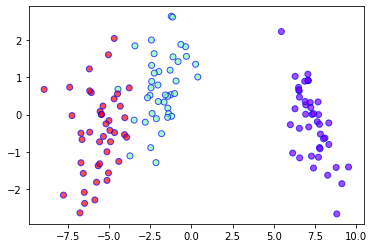

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',alpha=0.7,edgecolors='b')

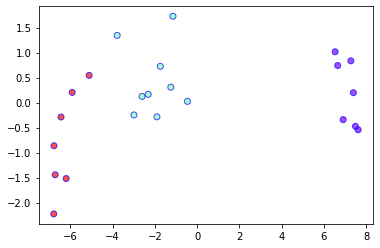

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='rainbow',alpha=0.7,edgecolors='b')

In [ ]:
classifier = RandomForestClassifier(max_depth=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred)*100)

100.0


In [ ]:
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

[[7 0 0]
 [0 9 0]
 [0 0 7]]


In [ ]:
cm_df = pd.DataFrame(conf_m, index = ['SETOSA','VERSICOLR','VIRGINICA'], columns = ['SETOSA','VERSICOLR','VIRGINICA'])

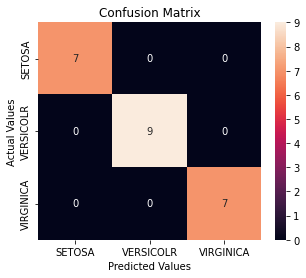

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#**LDA from scratch**

In [ ]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):

        n_features = X.shape[1]
        class_labels = np.unique(y)

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))

        for c in class_labels:

            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        
        A = np.linalg.inv(SW).dot(SB)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvalues = eigenvalues.real
        eigenvectors = eigenvectors.real
        eigenvectors = eigenvectors.T

        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.linear_discriminants = eigenvectors[0 : self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

Shape of X: (127, 4)
Shape of transformed X: (127, 2)


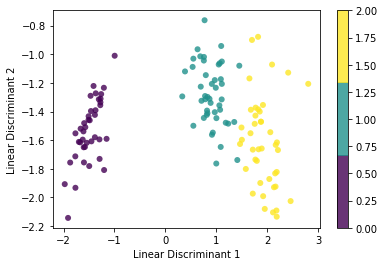

In [ ]:
if __name__ == "__main__":


    data = datasets.load_iris()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=4, shuffle=True)

  
    lda = LDA(2)
    lda.fit(X_train, y_train)
    X_projected = lda.transform(X_train)

    lda.fit(X_test, y_test)
    X_test_projected = lda.transform(X_test)

    print("Shape of X:", X_train.shape)
    print("Shape of transformed X:", X_projected.shape)

    x1, x2 = X_projected[:, 0], X_projected[:, 1]

    plt.scatter(x1, x2, c = y_train, edgecolor = "none", alpha = 0.8, cmap = plt.cm.get_cmap("viridis", 3))

    plt.xlabel("Linear Discriminant 1")
    plt.ylabel("Linear Discriminant 2")
    plt.colorbar()
    plt.show()

In [ ]:
classifier = RandomForestClassifier(max_depth=2)
classifier.fit(X_projected, y_train)
y_pred = classifier.predict(X_test_projected)

In [ ]:
print(accuracy_score(y_test, y_pred)*100)

78.26086956521739


In [ ]:
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

[[10  0  0]
 [ 0  0  5]
 [ 0  0  8]]


In [ ]:
cm_df = pd.DataFrame(conf_m, index = ['SETOSA','VERSICOLR','VIRGINICA'], columns = ['SETOSA','VERSICOLR','VIRGINICA'])

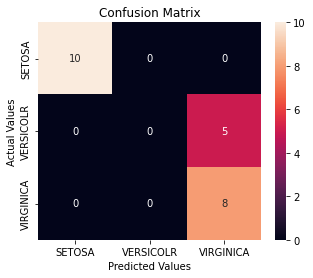

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

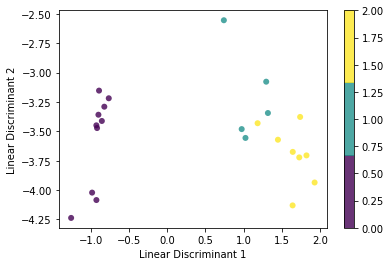

In [ ]:
x_test1, x_test2 = X_test_projected[:, 0], X_test_projected[:, 1]

plt.scatter(x_test1, x_test2, c = y_test, edgecolor = "none", alpha = 0.8, cmap = plt.cm.get_cmap("viridis", 3))

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()